<a href="https://mroc170.github.io/">mroc170.github.io</a>

<h3>Mason Riley O'Connor</h3>
<h3>CMPS3660 Tutorial Milestone 1</h3>

<p><a href="https://www.kaggle.com/cjgdev/formula-1-race-data-19502017#races.csv"> This data set</a> from <a href="kaggle.com">kaggle.com</a> is a set of csv files with Formula 1 race data from the past 70 years. Although it does not include the two most recent seasons, it is very thorough and has very few missing values. All tables have appropriate primary keys as well as foreign keys. In addition to the data set being large, thorough, and in an accessible format, I am also very interested in the subject matter and will be very engaged with the research and data. Formula 1 is known as a marvel of engineering and data optimization. Much of the data used by teams is kept private but these publicly known results are important nonetheless. This data set will allow me to analyze many relationships and make assertions about a subject matter I am familiar with.</p>

In [279]:
import pandas as pd
import matplotlib.pyplot as plt
drivers_df = pd.read_csv("./data/drivers.csv", encoding = "ISO-8859-1")
drivers_df = drivers_df[drivers_df.columns[0:-1]]
drivers_df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality
0,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,10/05/1977,German
2,3,rosberg,6.0,ROS,Nico,Rosberg,27/06/1985,German
3,4,alonso,14.0,ALO,Fernando,Alonso,29/07/1981,Spanish
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,19/10/1981,Finnish



<p>I am particularly interested in analyzing the relationships that influence driver success in relation to their team situation and the situations of individual races. For teams, I am interested to see if there is a correlation between driver nationality and team nationality as well as the age of a team versus driver experience. For individual races there are many specific statistics that are not often brought up, and commentators and analysts tend to focus on the top drivers without talking about all of the racers. I'd like to analyze how drivers perform at tracks in their country as well as the country of their team and look at more specific stats like time of race, time zone of the track, and track characteristics to speculate how drivers may perform at new tracks added to the race calendar since 3 new tracks are being added in 2020 alone.</p>
<p>The scoring system for Formula 1 has been changed multiple times in the 90's alone which has influenced certain statistics on face Value. Titles like most points of all time and most points per race are both attributed to Lewis Hamilton despite more race wins by Michael Schumacher. A quick look at the top 10 drivers in this category reveal that this list is determined primarily by the era in which a driver competes. While the data set already has points awarded in the race statistics, I would like to look at these performances from different eras more objectively by categorizing them all with each of the points systems and seeing if any championship results change specifically and see if this data supports one points system over another. These files also contain information about mechanical failures and crashes in races that can be accounted for to adjust the real-world statistics with these DNFs that are not the fault of the driver to show a more accurate representation of driver talent.</p>
<p>This data set is very convenient, and I have found others to reference for additional data, although they may require more formatting to use effectively. There are many valuable questions that this data may help to answer, such as the relative efficacy of different points systems, whether or not car performance is overshadowing driver performance, and what tracks make for unpredictable race results.</p>

## Milestone 2:
Here I'll import the rest of the csvs

In [280]:
circuits_df = pd.read_csv("./data/circuits.csv", encoding = "ISO-8859-1")
circuits_df = circuits_df[circuits_df.columns[0:-2]] #removing the URL column and altitude since only 1 track has info
constructor_results_df = pd.read_csv("./data/constructorResults.csv", encoding = "ISO-8859-1")
constructor_results_df = constructor_results_df[constructor_results_df.columns[0:-1]] #removing status column as it is largely useless
constructors_df = pd.read_csv("./data/constructors.csv", encoding = "ISO-8859-1")
constructors_df = constructors_df[constructors_df.columns[0:-2]] #removing literally useless column and URL
#removing position text column (it is redundant in this context) and another empty column
constructor_standings_df = pd.read_csv("./data/constructorStandings.csv", encoding = "ISO-8859-1")[["constructorStandingsId", "raceId", "constructorId", "points", "position", "wins"]]
driver_standings_df = pd.read_csv("./data/driverStandings.csv", encoding = "ISO-8859-1")[["driverStandingsId", "raceId", "driverId", "points", "position", "wins"]]#removing position text column (it is redundant in this context)
laptimes_df = pd.read_csv("./data/lapTimes.csv", encoding = "ISO-8859-1")
pitstops_df = pd.read_csv("./data/pitStops.csv", encoding = "ISO-8859-1")
qualifying_df = pd.read_csv("./data/qualifying.csv", encoding = "ISO-8859-1")
races_df = pd.read_csv("./data/races.csv", encoding = "ISO-8859-1")
races_df = races_df[races_df.columns[0:-1]] #removing URL
results_df = pd.read_csv("./data/results.csv", encoding = "ISO-8859-1") #although this df is wide, it is in fact tidy
#I didn't import the seaons csv because all it contains is the seaons and their wikipedia pages
status_df = pd.read_csv("./data/status.csv", encoding = "ISO-8859-1")

Let's clean up these dataframes a bit. I'll explain each change in a comment before the operation.

In [281]:
#no changes yet but figured I'd find needs as I work

## Exploratory analysis
Let's take a peek at what information our data holds by looking at some results from Lewis Hamilton, one of F1's most iconic drivers, and his records at different circuits.

In [282]:
#hamilton's driver ID is 1, so this comprehension filters for just hamilton's results
hamilton_results = results_df[results_df["driverId"] == 1]
hamilton_results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1
26,27,19,1,1,22.0,9,5.0,5,5,4.0,56,46.548,5525103.0,53.0,3.0,01:35.5,209.033,1
56,57,20,1,1,22.0,3,13.0,13,13,0.0,56,NaN,NaN,25.0,19.0,01:35.5,203.969,11
68,69,21,1,1,22.0,5,3.0,3,3,6.0,66,4.187,5903238.0,20.0,3.0,01:22.0,204.323,1
89,90,22,1,1,22.0,3,2.0,2,2,8.0,58,3.779,5213230.0,31.0,2.0,01:26.5,222.085,1


These results have the information on both starting position (grid) and race finish position (position). Lets put these on a scatter plot and see how pole position affects hamilton's results.

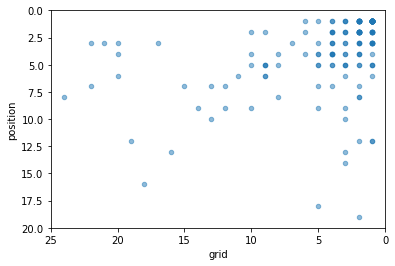

In [283]:
hamilton_results.plot.scatter(x="grid", y="position", alpha=0.5).axis([25, 0, 20, 0]);

This graph doesn't make the correlation entirely clear because all most of the data points are around the same area. All this graph tells us is something we already know: Hamilton is good at racing. Let's try looking at the same graph but for all drivers.

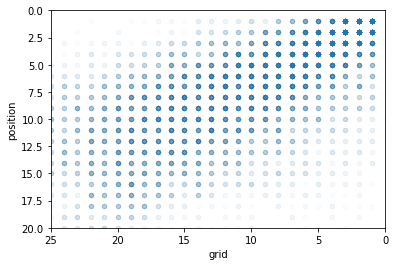

In [284]:
results_df.plot.scatter(x="grid", y="position", alpha=0.02).axis([25, 0, 20, 0]);

This graph makes it much more clear there is a correlation between grid position and finish position with the majority of points close to the main diagonal. Now that we have observed a correlation, lets quantify it and see if Hamilton is as dependent on starting position as the rest of the drivers.

In [285]:
#calculating correlation for all drivers
all_sf_corr = results_df["grid"].corr(results_df["position"])
#calculating correlation for hamilton
ham_sf_corr = hamilton_results["grid"].corr(hamilton_results["position"])
print("Average Correlation " + str(all_sf_corr))
print("Hamilton's Correlation " + str(ham_sf_corr))

Average Correlation 0.6512519835971705
Hamilton's Correlation 0.40561126326253893


So both contain a non-negligible correlation, but Hamilton's fate is not as dependent on his qualifying performances as other drivers. Let's try to see if this is due to working his way up the pack or squandering pole position by looking at his performance on pole vs further back in the grid. We will exclude retirements since they are not as tied to driver performance.

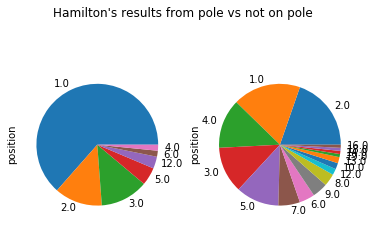

In [286]:
fig, axs = plt.subplots(1,2)
hamilton_results[hamilton_results.grid == 1].position.value_counts().plot.pie(ax=axs[0])
hamilton_results[hamilton_results.grid != 1].position.value_counts().plot.pie(ax=axs[1])
plt.suptitle("Hamilton's results from pole vs not on pole");

So when Hamilton starts on pole, he wins more than half the time, with the second most common result being second place. When he doesn't start on pole, he still finishes in the top 4 over half the time, and rarely finishes outside the points. Let's again compare this to all of our recorded results:

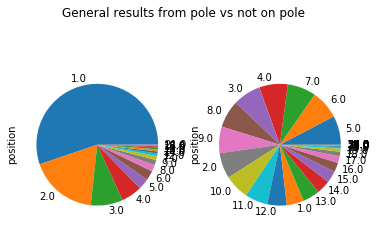

In [287]:
fig, axs = plt.subplots(1,2)
results_df[results_df.grid == 1].position.value_counts().plot.pie(ax=axs[0])
results_df[results_df.grid != 1].position.value_counts().plot.pie(ax=axs[1])
plt.suptitle("General results from pole vs not on pole");

These pie charts show that Hamilton not only converts the pole to a win significantly more often, he also wins much more often while starting out of position. This may not be the most fair comparison since Hamilton's starting positions are fairly high, even when not on pole. Let's see how he tends to perform differently on different tracks. 

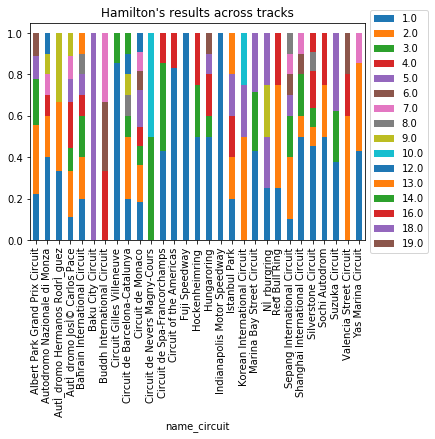

In [288]:
#merging races_df with circuits_df to get track name for each race
races_with_circuit = races_df.merge(circuits_df, on="circuitId", suffixes=["", "_circuit"])

ham_circuit_finishes = races_with_circuit.merge(hamilton_results, 
                                                on="raceId", 
                                                suffixes=["_race","_driver"]
                                                ).pivot_table(index="name_circuit",
                                                              columns="position",
                                                              values="circuitRef",
                                                              aggfunc="count")
ham_normal_finishes = ham_circuit_finishes.divide(ham_circuit_finishes.sum(axis=1), axis=0)
ham_normal_finishes.plot.bar(stacked=True, legend=False)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Hamilton's results across tracks");

From this graph we can see that Hamilton has won at all but 5 of the circuits he has raced at. It also shows his domination at American tracks like The Circuit of the Americas and Indianapolis Motor Speedway.
But perhaps we are being a bit too cavalier by focusing on Hamilton before looking at other great drivers. Let's take a few approaches to looking at top drivers, starting with who has the most wins.

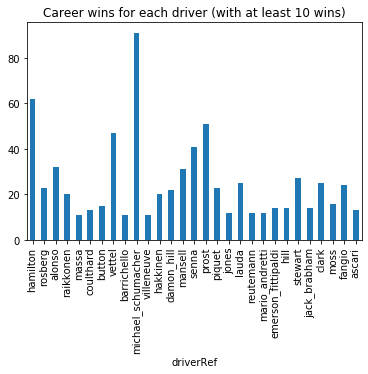

In [303]:
race_wins = results_df[results_df["position"] == 1] #filtering for race wins
win_counts = race_wins.groupby(race_wins["driverId"]).position.sum() #counting race wins for each driver
win_counts_with_name = drivers_df.merge(win_counts, on="driverId") #merging with driver_df to see names
high_counts = win_counts_with_name[win_counts_with_name["position"] > 10] #filtering to drivers who have won at least 10 races
high_counts.set_index("driverRef").position.plot.bar() #plotting wins across drivers
plt.title("Career wins for each driver (with at least 10 wins)");